<a href="https://colab.research.google.com/github/eroolpal/detect_damagecause/blob/master/20200318firefloodearthfraud2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:

from fastai.vision import *

In [0]:
folder = 'fire'
file = 'urls_fire.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving firedamaged1.csv to firedamaged1.csv


In [0]:
!mv firedamaged1.csv data/damage/urls_fire.csv


In [0]:
classes = ['fire','flood','earthquake', 'no damage']

In [7]:
download_images(path/file, dest, max_pics=1100)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error \ Invalid URL 

In [0]:
folder = 'flood'
file = 'urls_flood.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
from google.colab import files
uploaded = files.upload()

Saving flooddamaged1.csv to flooddamaged1.csv


In [0]:
!mv flooddamaged1.csv data/damage/urls_flood.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [12]:
download_images(path/file, dest, max_pics=1100)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
folder = 'earthquake'
file = 'urls_earthquake.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [15]:
from google.colab import files
uploaded = files.upload()

Saving earthquakedamaged1.csv to earthquakedamaged1.csv


In [0]:
!mv earthquakedamaged1.csv data/damage/urls_earthquake.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [18]:
download_images(path/file, dest, max_pics=1100)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
folder = 'fraud'
file = 'urls_fraud.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [21]:
from google.colab import files
uploaded = files.upload()

Saving goodhousesdamaged.csv to goodhousesdamaged.csv


In [0]:
!mv goodhousesdamaged.csv data/damage/urls_fraud.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [24]:
download_images(path/file, dest, max_pics=1100)

In [25]:
#Remove images that are not images at all
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

fire


flood


earthquake


fraud


In [0]:


#set aside 20% of the data to a validation set, random seed is created to get the same validation set everytime
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         ds_tfms=get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.), size=224, num_workers=4).normalize(imagenet_stats)

In [47]:
data.classes

['earthquake', 'fire', 'flood', 'fraud']

In [0]:
from fastai.widgets import *


In [0]:

db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:

learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

FileNotFoundError: ignored

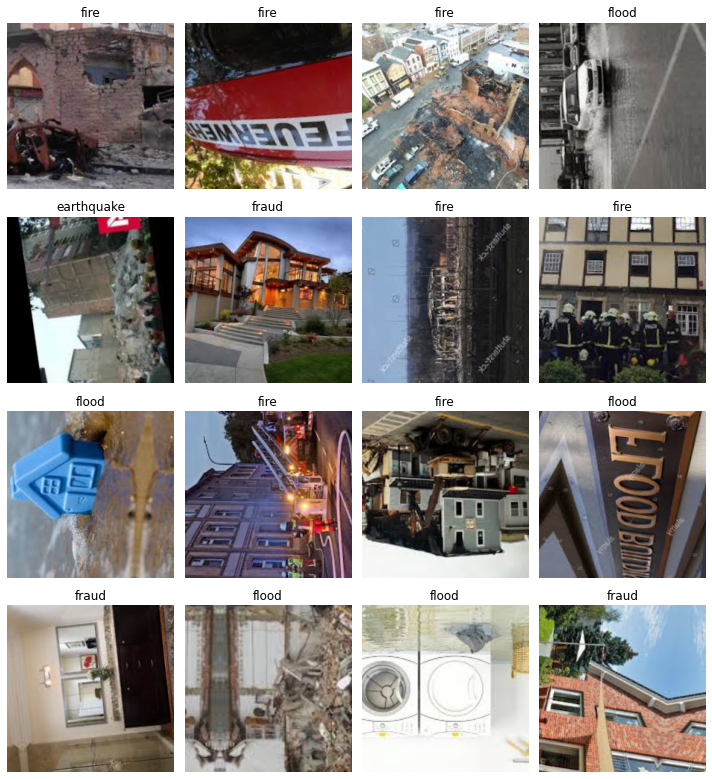

In [51]:
data.show_batch(rows=4, figsize=(10,11))

In [52]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['earthquake', 'fire', 'flood', 'fraud'], 4, 3388, 847)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [54]:
#defaults.device= torch.device('gpu')
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.684788,1.035169,0.367178,00:37
1,1.322054,0.858891,0.317591,00:36
2,1.082484,0.768861,0.303424,00:36
3,0.942393,0.755462,0.303424,00:36


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [57]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


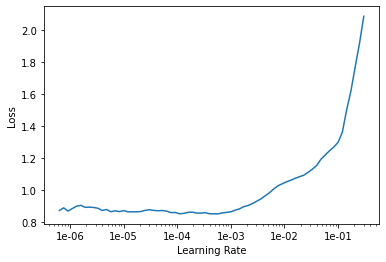

In [58]:
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.036281,1.204550,0.356553,00:41
1,0.881028,0.703117,0.273908,00:41


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [62]:
interp = ClassificationInterpretation.from_learner(learn)

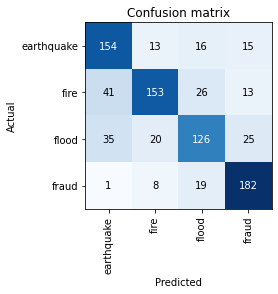

In [63]:

interp.plot_confusion_matrix()

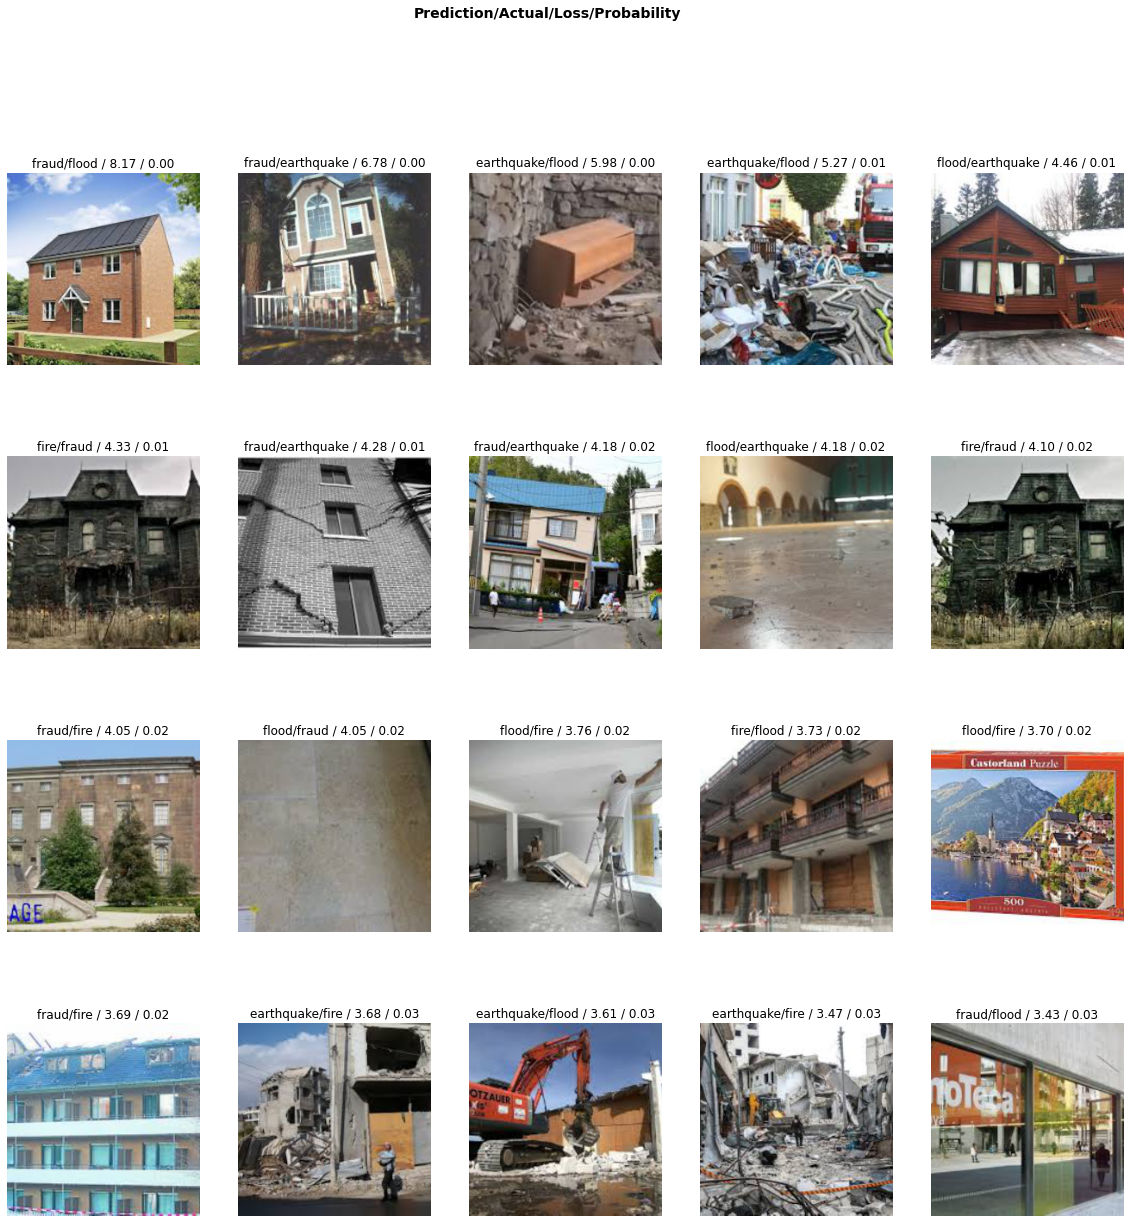

In [64]:
interp.plot_top_losses(20, figsize=(20,20))

Clean up the text

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
#ImageCleaner(ds, idxs, path, duplicates=True)

In [0]:

learn_cln.fit_one_cycle(4)

In [0]:
learn_cln.unfreeze()

In [0]:
learn_cln.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


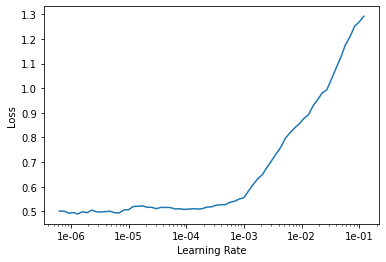

In [0]:
learn_cln.recorder.plot()

In [0]:
learn_cln.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

In [0]:
len(data)

TypeError: ignored

In [0]:
interp1 = ClassificationInterpretation.from_learner(learn_cln)

IndexError: ignored

Putting your model in production

In [0]:

learn.export()

In [0]:

defaults.device = torch.device('cpu')

In [0]:
from google.colab import files
uploaded = files.upload()

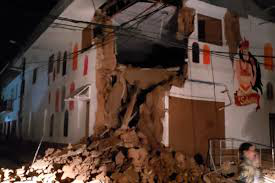

In [0]:
img = open_image('china_earthquake.jpeg')
img

In [0]:

learn = load_learner(path)

In [0]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category earthquake